### Por realizar:
* Crear 
* Unificar fechas para validar y crear graficos en discharge
* Aplicar Regex para verificar que se unifiquen todos los sintomas


## Análisis de datos COVID-19

### Objetivo:
#### Identificación de individuos que presentan síntomas y características específicas, padecen la enfermedad COVID-19 y están con riesgo de muerte.

#### Se utilizarán herramientas de análisis de datos con Python, Pandas, Matplotlib, numpy y scikit-learn.

In [1]:
# Importamos las librerías necesarias para el análisis de datos.
# Pandas para el manejo y tratamiento de los datos
# Numpy para poder trabajar con matrices multidimensionales
# Matplotlib para visualización de data
# Seaborn para visualización de data, basado en matplotlib
# Re para expresiones regulares

import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import pandas as pd
import numpy as np
import re

# Se indica a matplotlib mostrar el gráfico en la celda a ejecutar y guarda el gráfico en el notebook.
%matplotlib inline
# Configura los estilos de los gráficos de seaborn
sns.set_style("whitegrid")

### 0) Preparación de la información y data
#### Importaremos el dataset 

In [2]:
# Importamos el archivo CSV como un DF
df_full = pd.read_csv('latestdata.csv')


/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,2,9,10,12,13,14,15,16,17,19,21,22,23,24,25,26,27,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Creamos un nuevo DF con las filas donde las edades no son nulos
df_preProcessing = df_full[df_full['age'].notna()]


In [4]:
# Creamos un nuevo DF solo con las columnas que nos sirven y fueron previamente limpiadas por edad.
df_clean = df_preProcessing[[
     'age', 'sex', 'date_onset_symptoms', 
     'date_admission_hospital', 'date_confirmation', 
     'symptoms', 'chronic_disease_binary', 'chronic_disease', 
     'source', 'outcome', 'date_death_or_discharge', 'notes_for_discussion', 'country'
     ]]

df_clean.head()


,age,sex,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,chronic_disease_binary,chronic_disease,source,outcome,date_death_or_discharge,notes_for_discussion,country
1,78,male,NaN,NaN,21.02.2020,NaN,False,NaN,https://www.corriere.it/cronache/20_febbraio_2...,death,22.02.2020,NaN,Italy
2,61,female,NaN,NaN,14.02.2020,NaN,False,NaN,https://www.channelnewsasia.com/news/singapore...,discharge,17.02.2020,NaN,Singapore
27,66,male,NaN,NaN,07.02.2020,NaN,False,NaN,https://m.weibo.cn/detail/4469604653292027,NaN,NaN,https://www.google.com/maps/place/Zhenlai+Coun...,China
28,27,female,NaN,NaN,07.02.2020,NaN,False,NaN,https://m.weibo.cn/detail/4469604653292027,NaN,NaN,NaN,China
29,17,male,NaN,NaN,07.02.2020,NaN,False,NaN,https://m.weibo.cn/detail/4469604653292027,NaN,NaN,NaN,China


In [5]:
# Analizamos las filas con datos nulos que quedan en el dataset, en la edad no quedan nulos
obj = df_clean.isnull().sum()
for key, value in obj.iteritems():
    print(key, ",", value)

age , 0
sex , 1756
date_onset_symptoms , 78534
date_admission_hospital , 240989
date_confirmation , 218
symptoms , 241499
chronic_disease_binary , 0
chronic_disease , 242915
source , 154102
outcome , 240552
date_death_or_discharge , 242588
notes_for_discussion , 242827
country , 44


### 1) Análisis, limpieza y agrupación de datos por Edad


In [6]:
# Cuenta total de registros por edad
ageTotalCount = df_clean.age.count()
print("Existen {} registros en el DF".format(ageTotalCount))


Existen 243077 registros en el DF


In [7]:
# Visualización de formatos de edad
# df_clean.age.unique()
print("ver edad")

ver edad


In [8]:
# Visualización del DF sin nulos en la edad
df_clean.head()


,age,sex,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,chronic_disease_binary,chronic_disease,source,outcome,date_death_or_discharge,notes_for_discussion,country
1,78,male,NaN,NaN,21.02.2020,NaN,False,NaN,https://www.corriere.it/cronache/20_febbraio_2...,death,22.02.2020,NaN,Italy
2,61,female,NaN,NaN,14.02.2020,NaN,False,NaN,https://www.channelnewsasia.com/news/singapore...,discharge,17.02.2020,NaN,Singapore
27,66,male,NaN,NaN,07.02.2020,NaN,False,NaN,https://m.weibo.cn/detail/4469604653292027,NaN,NaN,https://www.google.com/maps/place/Zhenlai+Coun...,China
28,27,female,NaN,NaN,07.02.2020,NaN,False,NaN,https://m.weibo.cn/detail/4469604653292027,NaN,NaN,NaN,China
29,17,male,NaN,NaN,07.02.2020,NaN,False,NaN,https://m.weibo.cn/detail/4469604653292027,NaN,NaN,NaN,China


In [9]:
# Copia del DF sin nulos para modificarlo y poder trabajar las edades
df_test = df_clean

df_test.count()

age                        243077
sex                        241321
date_onset_symptoms        164543
date_admission_hospital      2088
date_confirmation          242859
symptoms                     1578
chronic_disease_binary     243077
chronic_disease               162
source                      88975
outcome                      2525
date_death_or_discharge       489
notes_for_discussion          250
country                    243033
dtype: int64

### Implementar Regex para estandarizar la data
#### Usar RegEX para validar los siguientes casos:

* Numeros enteros, guardar como enteros         ^\d(\d?)+$
* Rango de edades, obtener la media y guardar   ^\d(\d+)?\s?[-]\s?\d(\d+)?$
* Numeros decimales, redondear y guardar        ^\d(\.\d+)?$
* Edades con signo + / -                        ^\d\d?[-]?[+]?$
* Numeros y letras, obtener número y guardar    ^\d\d?\s\w+?$

RegEx devuelve un arreglo con el valor que haga match con la expresión

In [10]:
# Declaración de expresiones regulares
ageInt = '^\d(\d?)+$'
ageRange = '^\d(\d+)?\s?[-]\s?\d(\d+)?$'
ageFloat = '^\d(\.\d+)?$'
ageSign = '^\d\d?[-]?[+]?$'
ageText = '^\d\d?\s\w+?$'

# Arreglo para guardar nueva lista de edades
new_ages = []

# Recorremos las edades para estandarizar la información
for ages in df_test.age:
    strAges = str(ages)
    # RegEx Numeros enteros
    if re.findall(ageInt, strAges):
        new_ages.append(ages)
    # RegEx Rango de numeros
    elif re.findall(ageRange, strAges):
        indexes = ages.split('-')
        intIndexes = list(map(int, indexes))
        medianIndex = np.median(intIndexes)
        new_ages.append(int(medianIndex))
    # RegEx Numeros flotantes
    elif re.findall(ageFloat, strAges):
        formattedAge = int(round(float(ages)))
        new_ages.append(formattedAge)
    # ReEx Edades con signos (+/-)
    elif re.findall(ageSign, strAges):
        ageSt = re.findall(r'\d+', ages)
        new_ages.append(int(ageSt[0]))
    # Regex Edades con texto
    elif re.findall(ageText, strAges):
        monthAge = ages.split()
        monthConversion = int(monthAge[0]) / 12
        ageConverted = int(round(monthConversion))
        new_ages.append(ageConverted)
    else:
        new_ages.append("ERROR")
        
    
# Agregamos una nueva columna al DF con la edades nuevas
df_test["new_age"] = new_ages

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [11]:
# Reemplaza los datos nulos en la columna "Country" por el dato "Other" para poder separarlos
df_test['country'].fillna("Other", inplace=True)
df_test.isin(['Other']).any()

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


age                        False
sex                        False
date_onset_symptoms        False
date_admission_hospital    False
date_confirmation          False
symptoms                   False
chronic_disease_binary     False
chronic_disease            False
source                     False
outcome                    False
date_death_or_discharge    False
notes_for_discussion       False
country                     True
new_age                    False
dtype: bool

/usr/local/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


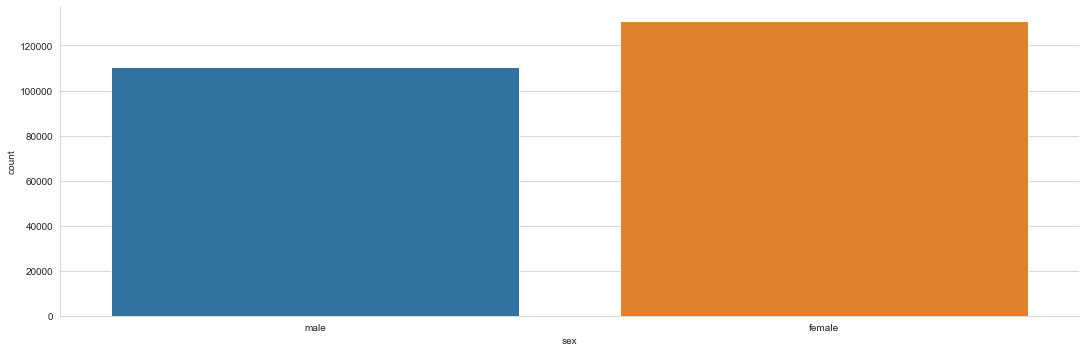

In [12]:
# Muestra la cantidad de contagios en hombres y mujeres
sns.factorplot('sex',data=df_test,kind="count", aspect=3)

### Agrupación de edades
#### Se crearán grupos de edad con la cantidad de registros coincidentes, estos serán:

* Niño: 0 - 8 años
* Adolescente: 9 - 14 años
* Joven: 15 - 18 años
* Adulto: 19 - 40 años
* Adulto Medio: 41 - 60 años
* Adulto Mayor: 60-120 años


In [13]:
# Creamos segmentación de grupos etarios con sus respectivas edades
gruposEtarios = [
    {'Niño': [0, 8]},
    {'Adolescente': [9, 14]},
    {'Joven': [15, 18]},
    {'Adulto': [19, 40]},
    {'Adulto Medio': [41, 60]},
    {'Adulto Mayor': [60, 120]}
]

# Inicializamos diccionario que tendrá el valor total de la cantidad por grupo
cantidadGrupoEtario = {
    'Niño': 0 ,
    'Adolescente': 0 ,
    'Joven': 0 ,
    'Adulto': 0 ,
    'Adulto Medio': 0 ,
    'Adulto Mayor': 0 
}

In [14]:
# Recorremos datos para clasificar grupos y guardarlo en un nuevo diccionario
df_edades = df_test.new_age

for getAge in df_edades:
    # Convertimos la edad a int
    if getAge != 'ERROR':
        currentAge = int(getAge)
        for ageRange in gruposEtarios:
            # Obtenemos el nombre del grupo etario y el rango (valores)
            ageRangeName = list(ageRange)[0]
            ageRangeValue = list(ageRange.values())[0]
            # Verificamos que la edad calce en un grupo etario para sumarla al total
            if ageRangeValue[0] <= currentAge <= ageRangeValue[1]:
                # Obtenemos la cantidad actual del rango en el diccionario
                dictActualValue = cantidadGrupoEtario.get(ageRangeName)
                # Actualizar el objeto final con cada dato
                cantidadGrupoEtario.update({ageRangeName: dictActualValue + 1})

# Muestra cantidad de gente por rango de edad
# Mostramos valor del diccionario actualizado   
print(cantidadGrupoEtario)

{'Niño': 2257, 'Adolescente': 4476, 'Joven': 512, 'Adulto': 59068, 'Adulto Medio': 92366, 'Adulto Mayor': 84747}


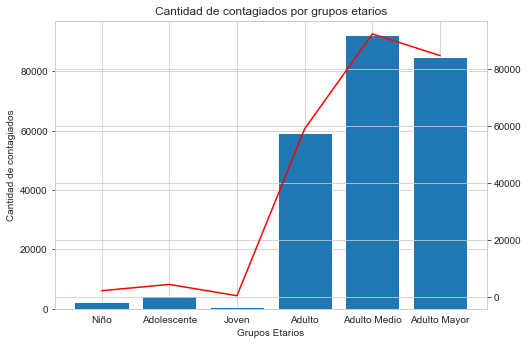

In [112]:
# Gráfico que muestra la cantidad de muertos por país
chartData = cantidadGrupoEtario

ageRangeNames = list(chartData.keys())
ageRangeValues = list(chartData.values())

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ageRangeNames
students = ageRangeValues

# Crea un nuevo Axis para el gráfico (linea roja)
plt.twinx()
plt.plot(ageRangeNames, ageRangeValues, color='red')

# Grafica las barras 
ax.bar(langs,students)
ax.set_ylabel('Cantidad de contagiados')
ax.set_xlabel('Grupos Etarios')
ax.set_title('Cantidad de contagiados por grupos etarios')
plt.show()





### Síntomas del Covid:
#### A continuación se detallan los sintomas que se presentan a causa del COVID

In [15]:
df_symptoms = df_test.loc[:, 'symptoms'].dropna()
df_sym_2 = df_symptoms

symtoms_array = []

for symtom in df_sym_2:
    getSymtom = symtom.split(',')
    if len(getSymtom) == 1:
        symtoms_array.append(getSymtom[0].strip().lower())
    else: 
        for sym in getSymtom:
            symtoms_array.append(sym.strip().lower())

symtoms_array = Counter(symtoms_array)

# Return the symtoms and the count of every of them
print(symtoms_array)


Counter({'fever': 786, 'cough': 476, 'sore throat': 91, 'headache': 55, 'fatigue': 51, 'asymptomatic': 51, 'malaise': 47, 'pneumonia': 39, 'runny nose': 36, 'chills': 35, 'pneumonitis': 34, 'dyspnea': 23, 'shortness of breath': 23, 'mild': 23, 'joint pain': 22, 'diarrhea': 20, 'phlegm': 20, 'respiratory symptoms': 17, 'nausea': 16, 'myalgia': 16, 'weakness': 15, 'fever (38 ° c)': 14, 'sputum': 14, 'muscular soreness': 13, 'acute respiratory failure:pneumonia': 11, 'acute respiratory distress syndrome:pneumonia': 11, 'fever 38': 10, 'dry cough': 10, 'fever (38 ℃)': 10, 'discomfort': 10, 'cough and milagia': 10, 'between others': 10, 'chest tightness': 10, 'nasal congestion': 9, 'weak': 9, 'chest distress': 9, 'general malaise': 8, 'fever (37 ℃)': 8, 'breathing difficulty': 8, 'chest pain': 8, 'vomiting': 8, 'rhinorrhea': 8, 'sneezing': 8, 'septic shock:pneumonia': 7, 'difficulty breathing': 6, 'anorexia': 6, 'fever; fatigue': 6, 'respiratory problems': 6, 'expectoration': 6, 'muscle ach

### Muertes por Covid:
#### A continuación se detallan los fallecidos a causa del COVID

In [100]:
# Revisamos el "outcome", el resultado del paciente y nos enfocamos a los que hayan fallecido.
# Outcome death
death_values = ['death', 'died', 'dead']
df_death_full = df_test[df_test['outcome'].isin(death_values)]

# Subselect of specify data (columns) 
df_death = df_death_full.loc[:, ['new_age', 'sex', 'chronic_disease', 'country', 'date_confirmation', 'date_death_or_discharge', 'symptoms', 'outcome']]
print(df_death.count())

new_age                    194
sex                        194
chronic_disease            101
country                    194
date_confirmation          157
date_death_or_discharge    187
symptoms                   137
outcome                    194
dtype: int64


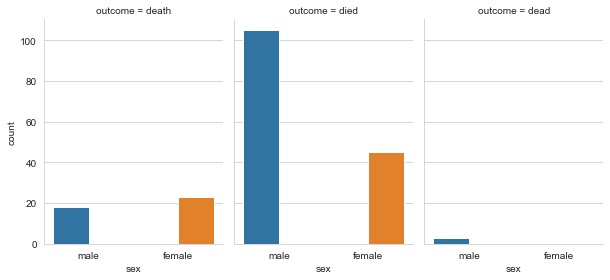

In [101]:
sns.catplot(x="sex", data=df_death, hue='sex',
    kind="count",
    col='outcome',
    height=4,
    aspect=.7);


In [27]:
# Returns the country with the amount of deaths
# Count amount of deaths by country
df_count_death_by_country = df_death.groupby(df_death.loc[:, 'country'].tolist(),as_index=False).size()
print(df_count_death_by_country)


Australia         2
Bahamas           1
Canada            2
China            49
Cuba              1
Ethiopia          1
France            3
Guyana            2
Italy             3
Japan             4
Other             2
Philippines      89
San Marino        1
United States    34
dtype: int64


Philippines      89
China            49
United States    34
dtype: int64


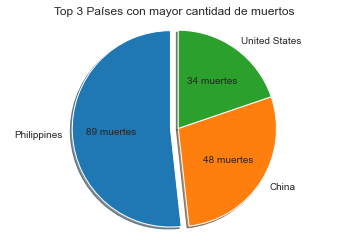

In [74]:
# Gráfico que muestra la cantidad de muertos por país
chartData = df_count_death_by_country.sort_values(ascending=False).head(3)


print(chartData)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = chartData.keys()
sizes = chartData.values
explode = (0.08, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:d} muertes".format(absolute)


fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct=lambda pct: func(pct, sizes),
        shadow=True, startangle=90)
ax1.set_title("Top 3 Países con mayor cantidad de muertos")
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


### Recuperados de Covid:
#### A continuación se detallan los recuperados del COVID

In [102]:
# Outcome discharge (Recovered)
df_discharge = df_test[df_test['outcome'] == 'discharge']
print(df_discharge)


       age     sex date_onset_symptoms date_admission_hospital  \
2       61  female                 NaN                     NaN   
113     28    male                 NaN                     NaN   
224     56  female                 NaN                     NaN   
335     79  female          30.01.2020                     NaN   
446     26    male          11.02.2020              14.02.2020   
...     ..     ...                 ...                     ...   
130026  66    male          17.01.2020              22.01.2020   
130048  28    male          20.01.2020              22.01.2020   
130055  53    male          23.01.2020              01.02.2020   
130056  42  female          02.02.2020              05.02.2020   
130057  39  female          30.01.2020              02.02.2020   

       date_confirmation symptoms  chronic_disease_binary  \
2             14.02.2020      NaN                   False   
113           14.02.2020      NaN                   False   
224           14.02.2020

In [20]:
# Returns the country with the amount of discharge (recovered) people
# Count amount of deaths by country
df_discharge_by_country = df_discharge.groupby(df_discharge.loc[:, 'country'].tolist(),as_index=False).size()
print(df_discharge_by_country)


Australia               16
China                    2
Italy                    1
Singapore               97
South Korea             17
United Arab Emirates     2
Vietnam                 32
dtype: int64


In [21]:
# Export DF to excel
# df_test.to_excel("reAged3.xlsx") 
